In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [1]:
df =pd.read_csv('Churn_Modelling.csv')

NameError: name 'pd' is not defined

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2. Summarize important observations from the data set (5 MARKS)


 a. Find out number of rows; no. & types of variables (continuous, categorical etc.)

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

here we have 10000 rows and 14 columns in dataset where as the columns are 2 float ,9 integer and 3 object type in it

b. Calculate five-point summary for numerical variables

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


c. Summarize observations for categorical variables – no. of categories, % observations in each
category

In [8]:
dfc= [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ]
dfc

['Surname', 'Geography', 'Gender']

In [9]:
(df['Gender'].value_counts()/len(df['Gender']))*100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [10]:
(df['Geography'].value_counts()/len(df['Geography']))*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [11]:
dfn= [key for key in dict(df.dtypes)
                   if dict(df.dtypes)[key]
                       in ['float64','float32','int32','int64']] 
dfn

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

d. Do variables have missing/null values?

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values in dataset

e. Do variables have outliers? 

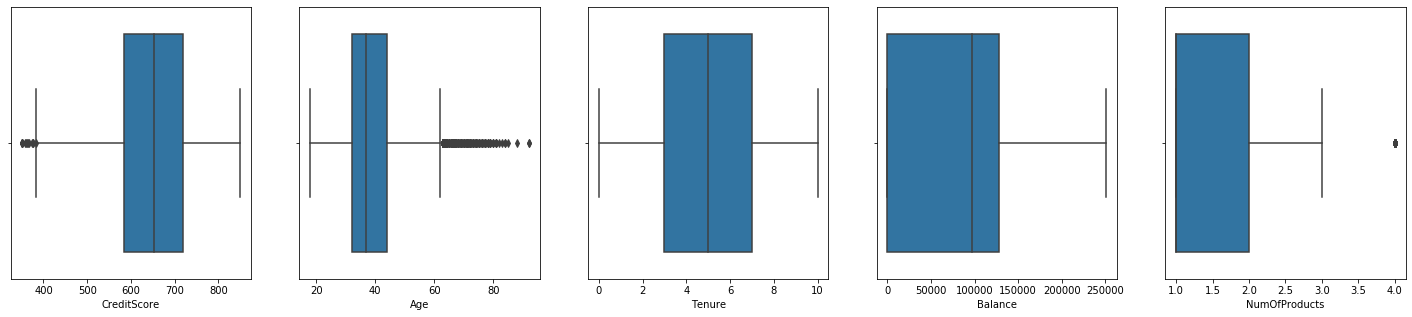

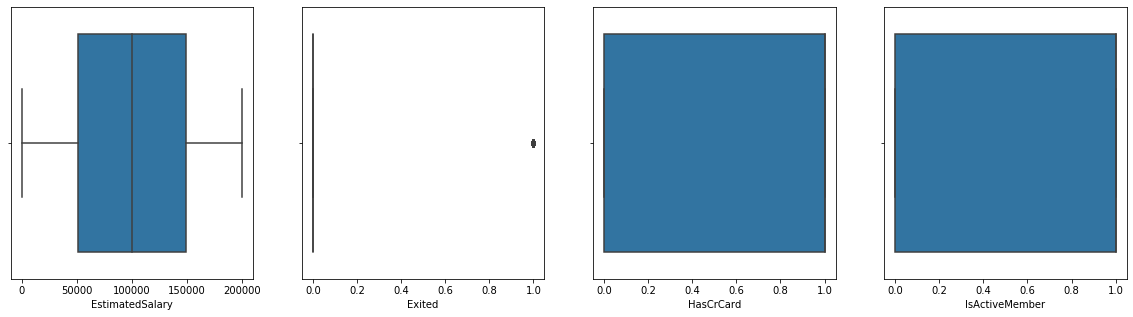

In [13]:
fig , ax = plt.subplots(1,5,figsize=(25,5))
sns.boxplot(df['CreditScore'],ax=ax[0])
sns.boxplot(df['Age'],ax=ax[1])
sns.boxplot(df['Tenure'],ax=ax[2])
sns.boxplot(df['Balance'],ax=ax[3])
sns.boxplot(df['NumOfProducts'],ax=ax[4])

plt.show()

fig , ax = plt.subplots(1,4,figsize=(20,5))

sns.boxplot(df['EstimatedSalary'],ax=ax[0])
sns.boxplot(df['Exited'],ax=ax[1])
sns.boxplot(df['HasCrCard'],ax=ax[2])
sns.boxplot(df['IsActiveMember'],ax=ax[3])

plt.show()

f. Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify
the problem.

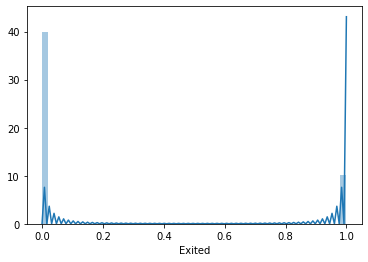

In [14]:
sns.distplot(df['Exited'])

Yes, The Target Variable is normally distributed as most of the data is under 0,1

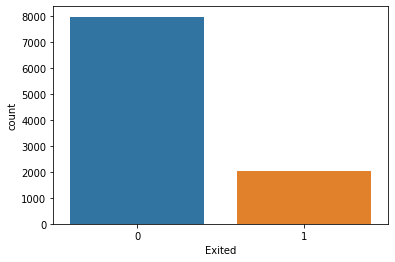

In [15]:
sns.countplot(df['Exited'])

In [16]:
(df['Exited']).value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

here total exited entries are 10000 among which 7963 are NO and  2037 are YES

g. Find out which are the variables most correlated or appear to
be in causation with Target? Do you want to exclude some variables from the model based
on this analysis? What other actions will you take?

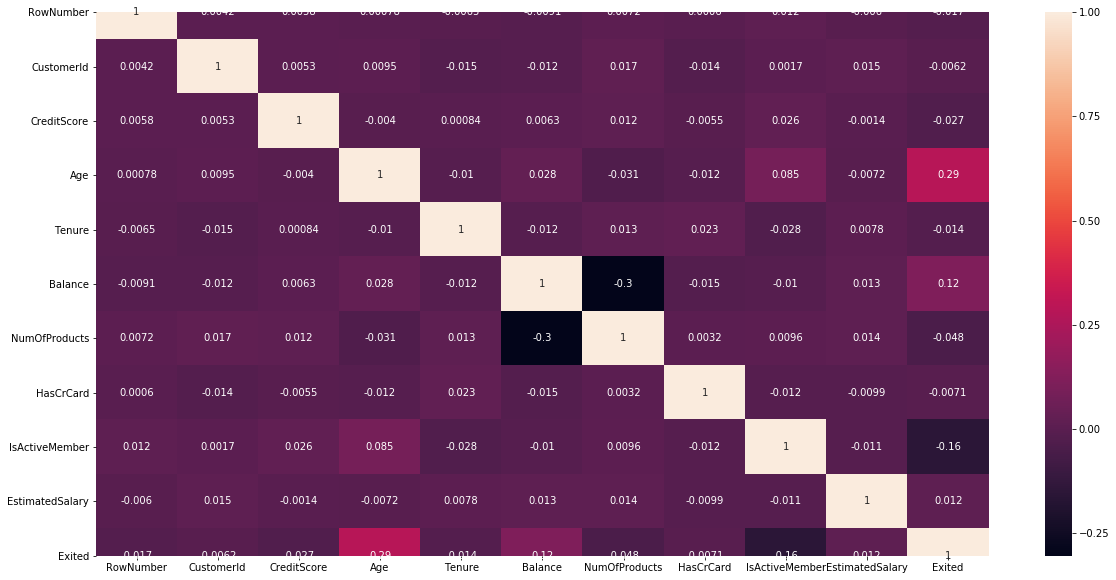

In [17]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(df.corr(), ax= ax, annot= True)

Here ,Considering all the features rather that neglecting it

# 3. Split dataset into train and test (70:30) (5 MARKS)

In [18]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'].tolist())
df['Geography'] = LabelEncoder().fit_transform(df['Geography'].tolist())
df['Surname'] = LabelEncoder().fit_transform(df['Surname'].tolist())

In [19]:
x=df.drop('Exited',axis=1)
y=df['Exited']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
x_train.shape,x_test.shape

((7000, 13), (3000, 13))

In [21]:
y_train.shape,y_test.shape

((7000,), (3000,))

In [22]:
df.shape

(10000, 14)

By combining the shape of the test and train data, We get the overall data.

i.e., Test and Train are proportions of the overall data

# 4. Fit a Logistic model and KNN model feel free to do parameter tuning to have good accuracy (10 MARKS)

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables.  

In [23]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

prediction = LR.predict(x_test)

a. What is the overall Accuracy? Please comment on whether it is good or not.

In [24]:
print("The accuracy is",accuracy_score(y_test, prediction))


The accuracy is 0.793


b. What is Precision, Recall and F1 Score and what will be the optimization objective keeping in
mind the problem statement.


In [25]:
print("Recall ",recall_score(y_test, prediction, average="weighted"))

print("Precision ",precision_score(y_test, prediction, average="weighted"))

print("f1_score ",f1_score(y_test, prediction, average="weighted"))

print(classification_report(y_test, prediction))

Recall  0.793
Precision  0.628849
f1_score  0.7014489682097045
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2379
           1       0.00      0.00      0.00       621

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



It means that observed and expected accuracy are same


# KNN CLASSIFIERS

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'uniform', algorithm = 'auto', leaf_size = 20, p = 3,
                             metric = 'minkowski')
knn.fit(x_train,y_train)
knn_prediction = knn.predict(x_test)

a. What is the overall Accuracy? Please comment on whether it is good or not.

In [27]:
print("The accuracy",accuracy_score(y_test, knn_prediction))

The accuracy 0.7826666666666666


b. What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

In [28]:


print("Recall ",recall_score(y_test, knn_prediction, average="weighted"))

print("Precision ",precision_score(y_test, knn_prediction, average="weighted"))

print("f1_score ",f1_score(y_test, knn_prediction, average="weighted"))

print(classification_report(y_test, knn_prediction))

Recall  0.7826666666666666
Precision  0.6913244444444444
f1_score  0.7086058147396892
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2379
           1       0.29      0.04      0.06       621

    accuracy                           0.78      3000
   macro avg       0.54      0.51      0.47      3000
weighted avg       0.69      0.78      0.71      3000

